In [19]:
import videodb

conn = videodb.connect(api_key="sk-EXIqHl_k3w869b7C2Pg0093Tih_dCkDS26qfhNV5h5U")

In [20]:
video_f = conn.upload("me.mov")

In [13]:
video_f.collection_id

'c-1642f3e2-5f75-47e4-b21c-2c3172ad992e'

In [14]:
video_f.id

'm-z-019aad67-178a-75f1-9f24-c672b905a259'

In [24]:
t_vid = video_f.index_spoken_words

AttributeError: 'function' object has no attribute 'get_transcript'

In [22]:
video_f.index_spoken_content()

AttributeError: 'Video' object has no attribute 'index_spoken_content'

In [ ]:
from videodb import IndexType
from videodb import SceneExtractionType

index_id = video_f.index_scenes(
    extraction_type=SceneExtractionType.shot_based,
    extraction_config={"threshold":20, "frame_count":5},
    prompt="describe the image in 100 words",
    callback_url="https://example.com/callback",
)

In [18]:
scene_index = video_f.get_scene_index(index_id)
scene_index

[{'description': 'This series of images captures an indoor ice skating rink, bustling with several individuals enjoying a recreational session. The wide, white ice surface, marked with red lines, fills the foreground, where skaters of varying ages and skill levels are seen gliding. In the background, rows of empty red stadium seating stretch along the sides, indicating a larger arena setting. Overhead, a high industrial ceiling with artificial lighting illuminates the entire space. The perspective subtly shifts between frames, suggesting movement within the scene, showcasing a casual and lively atmosphere.',
  'end': 3.17,
  'metadata': {},
  'scene_metadata': {},
  'start': 0.0},
 {'description': "This collection of captivating nighttime images showcases a tranquil waterfront scene, likely a river or canal, adorned with glowing lights. Traditional boats, often referred to as dhows, are beautifully illuminated, contrasting with the vibrant, lit-up city skyline reflected on the water's 

In [13]:
#extract a frame from a video

import cv2
import os

video = cv2.VideoCapture("video.MP4")

ret, frame_1 = video.read()


frame_1


array([[[ 96,  98,  93],
        [ 98, 100,  95],
        [102, 104,  99],
        ...,
        [ 22,   9,   2],
        [ 21,   8,   1],
        [ 21,   8,   1]],

       [[ 96,  98,  93],
        [ 98, 100,  95],
        [102, 104,  99],
        ...,
        [ 22,   9,   2],
        [ 21,   8,   1],
        [ 21,   8,   1]],

       [[ 96,  98,  93],
        [ 98, 100,  95],
        [102, 104,  99],
        ...,
        [ 22,   9,   2],
        [ 22,   9,   2],
        [ 22,   9,   2]],

       ...,

       [[205, 205, 210],
        [205, 205, 210],
        [205, 205, 210],
        ...,
        [193, 194, 195],
        [193, 194, 195],
        [193, 194, 195]],

       [[205, 205, 210],
        [205, 205, 210],
        [205, 205, 210],
        ...,
        [193, 194, 195],
        [193, 194, 195],
        [193, 194, 195]],

       [[205, 205, 210],
        [205, 205, 210],
        [205, 205, 210],
        ...,
        [193, 194, 195],
        [193, 194, 195],
        [193, 194, 195]]

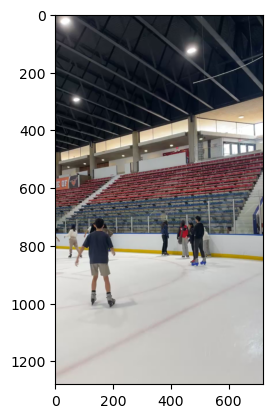

In [ ]:
import matplotlib.pyplot as plt

frame_1_rgb = cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB)

plt.imshow(frame_1_rgb)
plt.show()

In [16]:
#output the frame
cv2.imwrite('frame_1.jpg', frame_1)
print("Frame saved as frame_1.jpg")


Frame saved as frame_1.jpg


In [ ]:
video

In [12]:
scene_index

[{'description': 'This image captures an indoor ice rink busy with people enjoying recreational skating. The facility boasts a high, industrial-style ceiling with exposed metal trusses and bright overhead lights. Along the sides, tiered spectator seating in red and blue dominates the background. On the bright white ice surface, a group of predominantly young individuals are seen, with some actively gliding on skates while others stand or converse near the protective barriers. Notably, some participants appear to be wearing roller skates, presenting an unusual sight on the ice. The scene conveys a lively, social atmosphere perfect for a fun outing.',
  'end': 1.0,
  'metadata': {},
  'scene_metadata': {},
  'start': 0.0},
 {'description': 'This heavily motion-blurred image captures a dynamic scene, likely within an ice rink or large arena. Several indistinct figures, rendered as streaks of color, are in active movement across a bright white surface, suggesting ice skating or similar act

In [27]:

# text_json = video_f.get_transcript()
video_f.index_spoken_words()

InvalidRequestError: Invalid request: Spoken word index for video already exists. 

In [28]:
video_f.get_transcript()

[{'end': 0.48, 'start': 0.0, 'text': '-'},
 {'end': 0.84, 'speaker': 'A', 'start': 0.48, 'text': 'Hi'},
 {'end': 1.12, 'speaker': 'A', 'start': 0.84, 'text': 'there.'},
 {'end': 1.28, 'start': 1.12, 'text': '-'},
 {'end': 1.6, 'speaker': 'A', 'start': 1.28, 'text': 'How'},
 {'end': 1.76, 'speaker': 'A', 'start': 1.6, 'text': 'are'},
 {'end': 1.88, 'speaker': 'A', 'start': 1.76, 'text': 'you'},
 {'end': 2.16, 'speaker': 'A', 'start': 1.88, 'text': 'doing?'},
 {'end': 2.4, 'start': 2.16, 'text': '-'},
 {'end': 2.92, 'speaker': 'A', 'start': 2.4, 'text': "How's"},
 {'end': 3.08, 'speaker': 'A', 'start': 2.92, 'text': 'it'},
 {'end': 3.36, 'speaker': 'A', 'start': 3.08, 'text': 'going?'},
 {'end': 3.757007, 'start': 3.36, 'text': '-'}]

In [20]:
video_two = conn.upload("./weirdmovie.mp4")
indexx = video_two.index_scenes(
    extraction_type=SceneExtractionType.time_based,
    extraction_config={"time":20, "select_frames": ['first']},
    prompt="describe the entire video properly, with all frames being important",
)


In [21]:
indexed = video_two.get_scene_index(indexx)


In [22]:
indexed

[{'description': 'This video frame captures a stunning night-time cityscape viewed from across a shimmering body of water, likely a river or canal, presented in a vertical orientation, typical of a smartphone recording.\n\nThe top portion of the frame is dominated by a dark, inky night sky, sparsely dotted with tiny, faint white specks that resemble either distant stars, dust on the lens, or a subtle digital "sparkle" or "snow" effect often added to videos.\n\nIn the middle ground, a vibrant urban skyline unfolds. Several multi-story buildings and skyscrapers are visible, illuminated by their internal lights and exterior accents. Two prominent, tall buildings in the central left and center feature distinctive bright green illuminated logos or architectural lighting at their very tops, standing out against the dark sky. Other buildings to the right show numerous warm-toned window lights, suggesting an active city scene.\n\nThe lower half of the frame is filled with the dark, reflective 

In [5]:
import supabase
import dotenv
import os
dotenv.load_dotenv()

supabase = supabase.create_client(
    os.getenv("SUPABASE_URL"),
    os.getenv("SUPABASE_KEY")
)

supabase.table("test").select("*").execute()

APIError: {'message': "Could not find the table 'public.test' in the schema cache", 'code': 'PGRST205', 'hint': None, 'details': None}

In [2]:
import sqlalchemy
import dotenv
import os 
dotenv.load_dotenv()

conn = sqlalchemy.create_engine(os.getenv("DATABASE_URL"))

ValueError: invalid literal for int() with base 10: ''

In [20]:
# Use Phi-3.5 to generate text description from frame with query text
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import torch

# Load the image
image = Image.open('frame_1.jpg')

# Load Phi-3.5 vision model (reuse if already loaded)
try:
    # Try to use existing model/processor if available
    if 'processor' not in globals() or 'model' not in globals():
        model_id = "microsoft/Phi-3.5-vision-instruct"
        processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            device_map="auto",
            trust_remote_code=True
        )
except:
    model_id = "microsoft/Phi-3.5-vision-instruct"
    processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        device_map="auto",
        trust_remote_code=True
    )

# Define your query text - modify this to ask different questions
query_text = "What do you see in this image? Describe it in detail."

# Prepare the prompt
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": query_text}
        ]
    }
]

# Process inputs
prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
inputs = processor(prompt, image, return_tensors="pt").to(model.device)

# Generate description
generate_kwargs = {
    "max_new_tokens": 500,
    "temperature": 0.7,
    "do_sample": True,
}
with torch.no_grad():
    generation_output = model.generate(**inputs, **generate_kwargs)
    
# Extract and decode the response
generation_output = generation_output[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generation_output, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print("Query:", query_text)
print("\nDescription:")
print(response)

ValueError: Using a `device_map`, `tp_plan`, `torch.device` context manager or setting `torch.set_default_device(device)` requires `accelerate`. You can install it with `pip install accelerate`

In [1]:
# Test OpenRouter connection with phi-4 model
import requests
import os

# Set your OpenRouter API key (get it from https://openrouter.ai/)
# You can set it as an environment variable: export OPENROUTER_API_KEY="your-key-here"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY", "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")

# OpenRouter API endpoint
url = "https://openrouter.ai/api/v1/chat/completions"

# Test message
headers = {
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json",
}

# Try different phi-4 model identifiers
# Common ones: "microsoft/phi-4", "nextbit/phi-4-int4", etc.
model_name = "microsoft/phi-4"  # Adjust based on available models

data = {
    "model": model_name,
    "messages": [
        {
            "role": "user",
            "content": "Hello! Can you introduce yourself?"
        }
    ]
}

response = requests.post(url, headers=headers, json=data)
print("Status Code:", response.status_code)
print("Response:", response.json())


Status Code: 200
Response: {'id': 'gen-1763838224-dTDAuSuEBTPZKkXK6RZY', 'provider': 'DeepInfra', 'model': 'microsoft/phi-4', 'object': 'chat.completion', 'created': 1763838224, 'choices': [{'logprobs': None, 'finish_reason': 'stop', 'native_finish_reason': 'stop', 'index': 0, 'message': {'role': 'assistant', 'content': "Hello! I'm Phi, a sophisticated language model developed by Microsoft. I'm here to assist with a wide range of queries by providing information, helping solve problems, and offering explanations across numerous topics. Whether you have questions about technology, science, language, or general knowledge, feel free to ask, and I'll do my best to assist you. If you have any specific questions or need help with something, let me know!", 'refusal': None, 'reasoning': None}}], 'usage': {'prompt_tokens': 14, 'total_tokens': 101, 'completion_tokens': 87, 'estimated_cost': 1.316e-05, 'prompt_tokens_details': None}}


In [ ]:
# Load model directly
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-4-multimodal-instruct", trust_remote_code=True, dtype="auto")

processing_phi4mm.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- processing_phi4mm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vision_siglip_navit.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- vision_siglip_navit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


speech_conformer_encoder.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- speech_conformer_encoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-multimodal-instruct:
- processing_phi4mm.py
- vision_siglip_navit.py
- speech_conformer_encoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/opt/homebrew/Caskroom/miniconda/base/envs/cv/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:647: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

In [6]:
import supabase
import dotenv
import os
dotenv.load_dotenv()

supabase = supabase.create_client(
    os.getenv("SUPABASE_URL"),
    os.getenv("SUPABASE_KEY")
)

In [13]:
message_id = supabase.table("attachments")
a = message_id.select("storage_path").eq("message_id","9f9c443e-89c0-495c-b6f1-77ef30604b4a").execute().data[0]
print(a)
response = (
    supabase.storage
    .from_("videos")
    .get_public_url(a['storage_path'])
)
response

{'storage_path': 'attachments/2025-11-22/1763843233288_IMG_4058.jpeg'}


'https://ujertelpchurerutnjpp.supabase.co/storage/v1/object/public/videos/attachments/2025-11-22/1763843233288_IMG_4058.jpeg'